# Developer Student Club (DSC) - Beginner Machine Learning Track 

### Classification
Is a problem of identifying which categories an observation belongs to based on the training data.

Examples of Classification include:
* Detect *Spam* and *Non-Span* Email
* Detect cancer or not

### Logistic Regression
* Is a binary classifier
* Examines the linear relationship between features and label. 
* Uses [Sigmoid Function](https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf) to compute the probability for which categories an observation belongs to.
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

* Probability *f(x)* ranges from minimum 0 to maximum 1 that the closer f(x) to 1, the more likely the observation is in one category; and the closer f(x) to 0, the less likely the observation is in that cateogry.
* E.g. Logistic Regression to detect *Spam* and *Non-Span* Email with *Spam email* when f(x) = 1 and *Non-Spam email* when f(x) = 0. The f(x) = 0.9 means that there is 90% of likeliness that the email is Spam. 
* Logistic Regression can be used for both **Binary Classification** and **Multi-Label Classification**

### Logistic Regression for identifying Iris flower types. 
### [Iris Flower Dataset](https://www.kaggle.com/arshid/iris-flower-dataset)
* The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The **use of multiple measurements** in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to **quantify the morphologic variation of Iris flowers of three related species**. 
* The data set consists of **50 samples from each of three species** of Iris (Iris Setosa, Iris virginica, and Iris versicolor). **Four features** were measured from each sample: **the length and the width of the sepals and petals,** in centimeters.

![alt text](https://miro.medium.com/max/2006/1*8BQGOzI2cgNZxiqnjZPfMg.jpeg)

#### **Goal:** identify which specifici species of Iris the flower observation falls under

#### Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, plot_confusion_matrix

#### Load data

In [2]:
#load iris data
iris = load_iris()
data = iris.data
labels = iris.target

In [3]:
#parse data and labels into pandas.DataFrames for easy data manipulation
#df - DataFrame
df = pd.DataFrame(data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
df['species_id'] = labels

#label encoding
species_map = {0 : 'sentosa', 1 : 'versicolor', 2 : 'virginica'}
df['species_name'] = df['species_id'].map(species_map)

#### Explanatory Data Analysis (EDA)

##### Inspect first 5 rows of Iris dataset

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,5.1,3.5,1.4,0.2,0,sentosa
1,4.9,3.0,1.4,0.2,0,sentosa
2,4.7,3.2,1.3,0.2,0,sentosa
3,4.6,3.1,1.5,0.2,0,sentosa
4,5.0,3.6,1.4,0.2,0,sentosa


##### Inspect statistics of Iris dataset
[**FAQs**]()

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### Check missing values

In [6]:
df.isnull().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species_id      False
species_name    False
dtype: bool

##### Check Iris types

In [7]:
print(df['species_name'].unique())

['sentosa' 'versicolor' 'virginica']


##### Inspecting by visualization

###### Inspecting the balance of labels

<function matplotlib.pyplot.show(*args, **kw)>

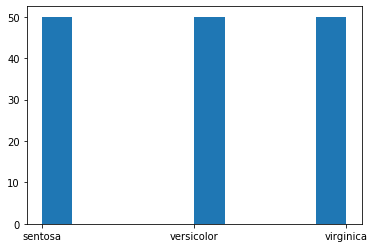

In [8]:
plt.hist(df['species_name'])
plt.show

###### Inspecting **Septal** feature by Length and Width

<function matplotlib.pyplot.show(*args, **kw)>

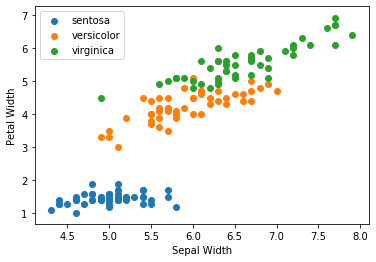

In [9]:
# By length
plt.scatter(df[df['species_id'] == 0]['sepal_length'], df[df['species_id'] == 0]['petal_length'], label = 'sentosa')
plt.scatter(df[df['species_id'] == 1]['sepal_length'], df[df['species_id'] == 1]['petal_length'], label = 'versicolor')
plt.scatter(df[df['species_id'] == 2]['sepal_length'], df[df['species_id'] == 2]['petal_length'], label = 'virginica')
plt.legend()
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

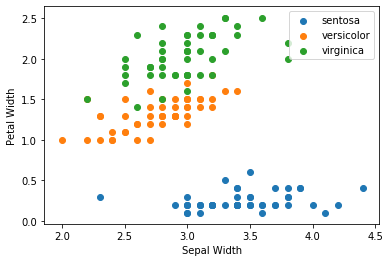

In [10]:
# By width

#### Split dataset into Train and Test subsets: *80% for training and 20% for testing*

In [11]:
from sklearn.model_selection import train_test_split
features = df.drop(['species_id', 'species_name'], axis = "columns") #drop columns
labels = df['species_id']
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, shuffle = True, random_state = 100)

#### Build **Logistic Regression** model

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
#create an instance of LogisticRegression model with: iteration_num = 100 and verbose = 1
logit_model = LogisticRegression(max_iter = 100, verbose = 1)

**Logistic Regression: How it is trained?** 🤔

#### Train **Logisitc Regression** model

In [14]:
logit_model.fit(train_features, train_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

#### Training steps

##### 1. Linear Formula
**y = w*x + b** that 
* **x, y** are input and output
* **w, b** are weight and bias that are initialized randomly. **GOAL** is to optimize **w, b** to minimize **LOSS**

##### 2. Sigmoid Function
- convert **y = f(x) = w*x + b** from **Linear Formula** above to probability between 0 and 1
![alt text](https://www.researchgate.net/profile/Knut_Kvaal/publication/239269767/figure/fig2/AS:643520205430784@1530438581076/An-illustration-of-the-signal-processing-in-a-sigmoid-function.png)

##### 3. Final formula of Losgistic Regression
* **Logistic regresion: f(X)** = σ(X) = 1 / (1 + e^(-X))
* **Sigmoid: σ(x)** = 1 / (1 + e^(-w*x - b))
* **Linear formua: y** = w*x + b
### => Logistic Regression y^ = 1 / (1 + e^(-w*x - b))

##### 4. Cost (Loss) functions: Cross Entropy (aka Log Loss)
![alt text](https://miro.medium.com/max/1122/1*KY8QcvVOz1sdUnVKKhxWyA@2x.png)


##### 5. Update weights and optimize
* With calculated loss, update weight **new_w = old_w +/- ɑ * loss [1]**

* Apply Calculus, **compute derivative of [1] and find old_w that new_w is minized**.

* Repeat this process over iterations, we got **Gradient Descent** that **cost** for each iteration will move to the **global minimum**

![alt text](https://ml-cheatsheet.readthedocs.io/en/latest/_images/gradient_descent_demystified.png) 

#### Making predictions

##### Making **Train** predictions

In [16]:
train_preds = logit_model.predict(train_features)
train_pred_probabilities = logit_model.predict_proba(train_features)

Accuracy score: 
0.975


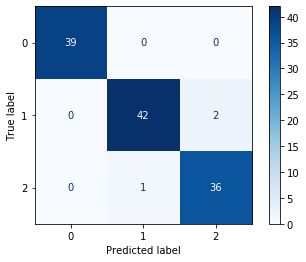

In [17]:
#test accuracy
train_confusion_matrix = confusion_matrix(train_preds, train_labels)
train_accuracy_score = accuracy_score(train_preds, train_labels)
train_disp = plot_confusion_matrix(logit_model, train_features, train_labels, cmap = plt.cm.Blues)
print("Accuracy score: ")
print(train_accuracy_score)

###### Visualizing Logistic Regression's train performance

In [24]:
#get coefficeints and intercepts
train_W, train_b = logit_model.coef_, logit_model.intercept_
train_W, train_b

(array([[-0.42028703,  0.90776111, -2.39052682, -1.02908856],
        [ 0.49992936, -0.34354659, -0.20184884, -0.79989468],
        [-0.07964232, -0.56421451,  2.59237567,  1.82898324]]),
 array([  9.39879797,   2.23932633, -11.63812429]))

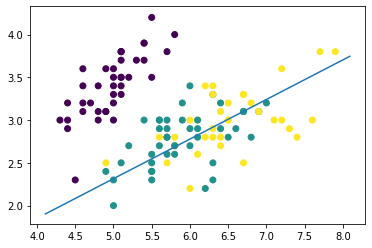

In [25]:
plt.scatter(train_features['sepal_length'], train_features['sepal_width'], c = train_labels)
ax = plt.gca()
ax.autoscale = False
xvals = np.array(ax.get_xlim())
yvals = -(xvals * train_W[0][0]) / train_W[0][1]
plt.plot(xvals, yvals)
plt.show()

##### Making **Test** predictions

In [26]:
# make predictions here


Accuracy score: 
0.9666666666666667


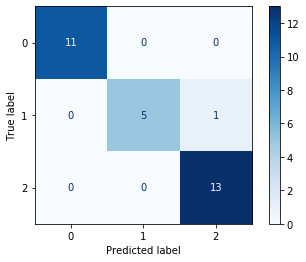

In [27]:
# test accuracy


###### Visualizing Logisitc Regression's Test performance

In [28]:
#get coefficeints and intercepts
test_W, test_b = logit_model.coef_, logit_model.intercept_
test_W, test_b

(array([[-0.42028703,  0.90776111, -2.39052682, -1.02908856],
        [ 0.49992936, -0.34354659, -0.20184884, -0.79989468],
        [-0.07964232, -0.56421451,  2.59237567,  1.82898324]]),
 array([  9.39879797,   2.23932633, -11.63812429]))

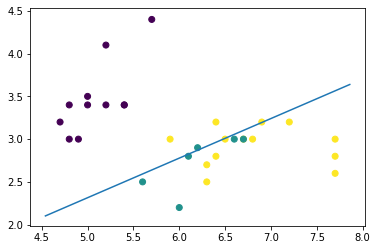

In [29]:
# plot decision boundary of Logistic Regression

### Some thoughts
* **Does accuracy score look good?** 
=> Yes
* **Does the model work that well in reality?** 
=> Yes, but not really. The dataset is too small (150 records) to conclude the model's performance
* **How to improve?**
=> Support Vector Machine (SVM) or Decision tree

#### Accuracy performance
---
In this notebook, the accuracy is high in both training and testing. However, the model may not maintain high accuracy against larger and rea-life datasets because this Iris dataset contains only 120 samples that do not represent variation.


#### Overfitting & Underfitting
---
**Overfitting** If the model does really great on the training data but poorly on the testing data, this means you may have overfitted.
  * **Reasons** : 
      * Mostly due to the limited dataset that the model cannot be trained to be generalized.
      * In this notebook, due to the limited Iris dataset, the logistic model in this notebook may easily encouter **overfitting** when it makes predictions against unseen data.
  * **Solutions** : 
      * Simplify ML algorithms/models
      * Add regularization

**Underfitting** is when your model does not capture all the detail of the data while overfitting is when your model captures too much detail and ends up showcasing random noise as well.
  * **Reason** : happen due to 
      * The simplicity of Machine Learning algorithms
      * Too few data features. 
  * **Solutions** : 
      * Build more complex ML algorithms/models
      * Add model parameters and data features.

  ![Overfitting & Underfitting](https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png)

**References**
* Logistic Regression in Sci-Kit Learn, https://blog.goodaudience.com/classifying-flowers-using-logistic-regression-in-sci-kit-learn-38262416e4c6
* Sigmoid Function, https://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch12.pdf